In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Reading Data

In [2]:
data = pd.read_csv("C:\\Users\\praya\\Downloads\\spam (1).csv" , encoding='ISO-8859-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
data.shape

(5572, 5)

In [4]:
data.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


### Data Cleaning

In [6]:
data = data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'] , axis = 1)

In [7]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
data = data.rename(columns={'v1' : 'Target' , 'v2' : 'Text'})
data.head()

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [10]:
# Encoding data target from spam/ham to 1/0

data['Target'] = encoder.fit_transform(data['Target'])

In [11]:
data.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
# Check missing values

data.isnull().sum()

Target    0
Text      0
dtype: int64

In [13]:
# Check for duplicates
data.duplicated().sum()

403

In [14]:
data.drop_duplicates(keep='first', inplace=True)
data.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
# Check for duplicates again
data.duplicated().sum()

0

In [16]:
# Final shape

data.shape

(5169, 2)

### EDA

In [17]:
data.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
values = data.Target.value_counts()
values

Target
0    4516
1     653
Name: count, dtype: int64

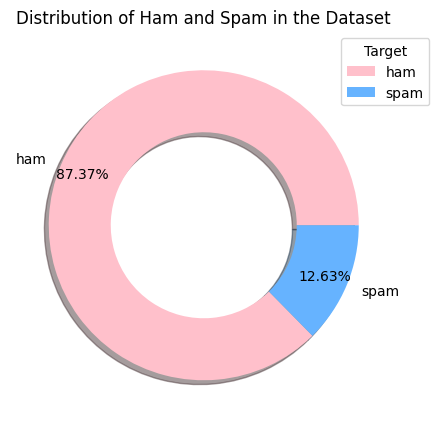

In [19]:
plt.figure(figsize=(5, 20))
plt.pie(data['Target'].value_counts(), labels=['ham', 'spam'] , colors=['pink', '#66b3ff'] , shadow= True  ,autopct='%1.2f%%', wedgeprops=dict(width=0.4) , pctdistance=0.85)
plt.legend(title='Target', loc='upper right', bbox_to_anchor=(1.1, 1))
plt.title('Distribution of Ham and Spam in the Dataset')
plt.show()

In [20]:
import nltk

In [21]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\praya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [22]:
# getting text length

data['Text_len'] = data['Text'].apply(len)
data.head()

,Target,Text,Text_len
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [23]:
# Getting text words length

from nltk.tokenize import word_tokenize

data['Text_word_len'] = data['Text'].apply((lambda x :  len(nltk.word_tokenize(x))))

In [24]:
data.head()

,Target,Text,Text_len,Text_word_len
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [25]:
# Getting text sentence length

from nltk.tokenize import word_tokenize

data['Text_sentence_len'] = data['Text'].apply((lambda x :  len(nltk.sent_tokenize(x))))

In [26]:
data.head()

,Target,Text,Text_len,Text_word_len,Text_sentence_len
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [27]:
data.columns

Index(['Target', 'Text', 'Text_len', 'Text_word_len', 'Text_sentence_len'], dtype='object')

In [28]:
num_col = ['Text_len', 'Text_word_len', 'Text_sentence_len']

In [29]:
data[num_col].describe()

,Text_len,Text_word_len,Text_sentence_len
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [30]:
# For spam

data[data.Target == 1][num_col].describe()

,Text_len,Text_word_len,Text_sentence_len
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [31]:
# For ham

data[data.Target == 0][num_col].describe()

,Text_len,Text_word_len,Text_sentence_len
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


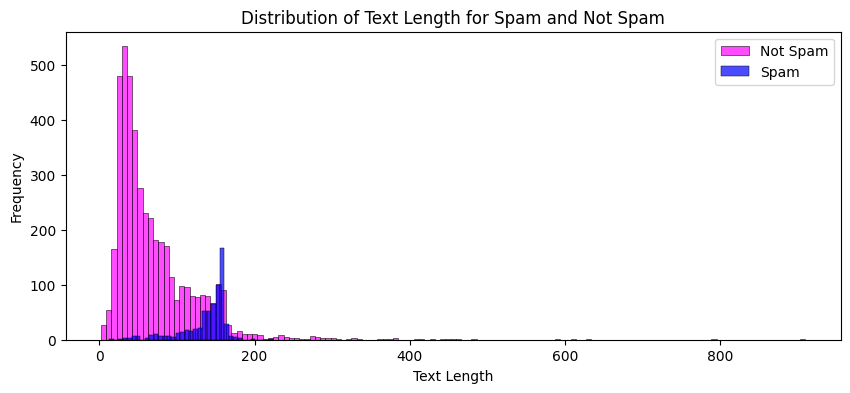

In [32]:
plt.figure(figsize=(10,4))



sns.histplot(data[data['Target'] == 0]['Text_len'] , label = 'Not Spam' , color = 'magenta' , alpha = 0.7 )
sns.histplot(data[data['Target'] == 1]['Text_len'] , label = 'Spam' , color = 'blue' , alpha = 0.7 )

plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.title('Distribution of Text Length for Spam and Not Spam')
plt.legend()
plt.show()

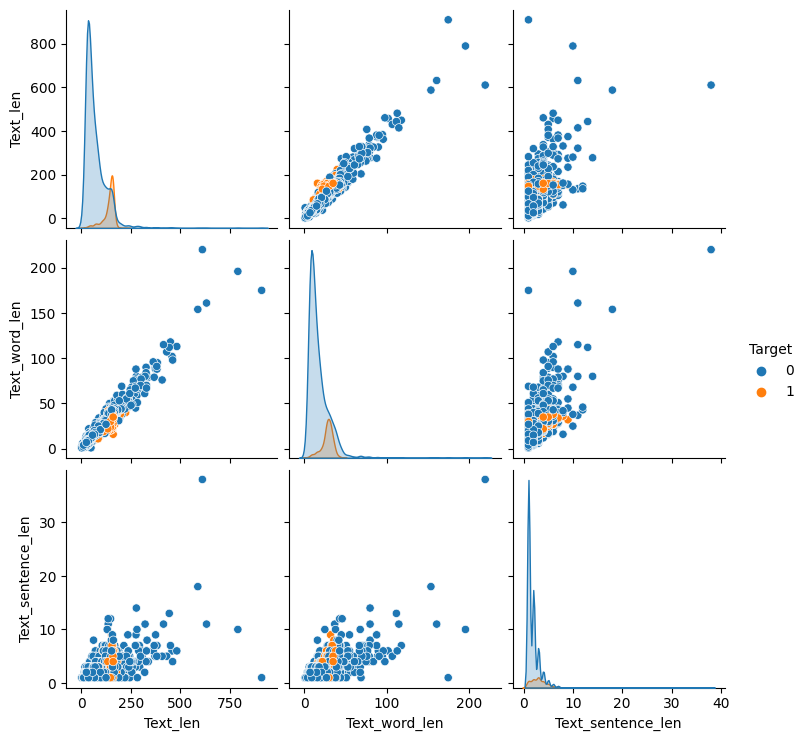

In [33]:
sns.pairplot(data=data , hue='Target')
plt.show()

In [34]:
data.columns

Index(['Target', 'Text', 'Text_len', 'Text_word_len', 'Text_sentence_len'], dtype='object')

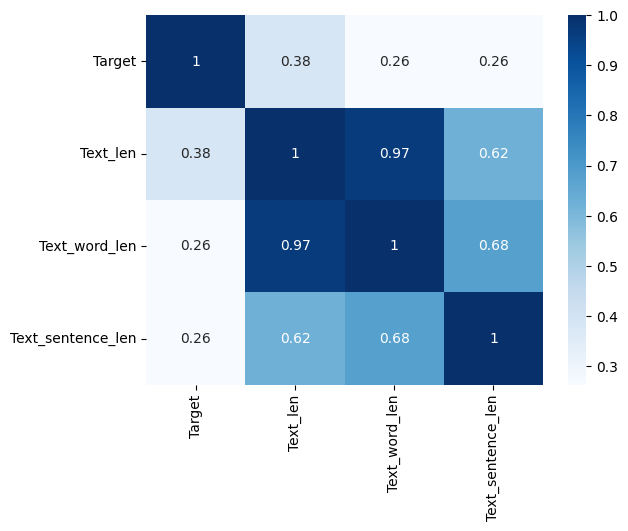

In [35]:
col = [ 'Target' , 'Text_len', 'Text_word_len', 'Text_sentence_len']
corr = data[col].corr()
sns.heatmap(corr , annot=True , cmap = 'Blues')
plt.show()

# Data Preprocessing

1) Lower case
2) Tokenization
3) Removing special characters
4) Removing stop words and punctuation
5) stemming

In [36]:
import nltk
from nltk.corpus import stopwords

In [37]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords.words('english')

import string
string.punctuation

from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\praya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [38]:
def transformed_text (text) :
    text = text.lower() # lower
    text = nltk.word_tokenize(text) # tokanization
    text = [i for i in text if i.isalnum()]
    stop_words = set(stopwords.words('english'))
    punctuation = set(string.punctuation)
    
    # Remove stopwords and punctuation, and apply stemming
    text = [ps.stem(word) for word in text if word not in stop_words and word not in punctuation]
    
    # Join tokens back into a single string
    text = " ".join(text)
    
    return text


   

In [39]:
data['Transformed_Text'] = data['Text'].apply(transformed_text)

In [40]:
data.head()

,Target,Text,Text_len,Text_word_len,Text_sentence_len,Transformed_Text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [43]:
from collections import Counter

def plot_most_frequent_words(text_series, title, num_words=30):
    all_words = ' '.join(text_series).split()
    word_counts = Counter(all_words)
    common_words = word_counts.most_common(num_words)
    
    words, counts = zip(*common_words)
    
    plt.figure(figsize=(8, 6))
    plt.barh(words, counts, color='skyblue')
    plt.xlabel('Frequency')
    plt.title(title)
    plt.gca().invert_yaxis()
    plt.show()

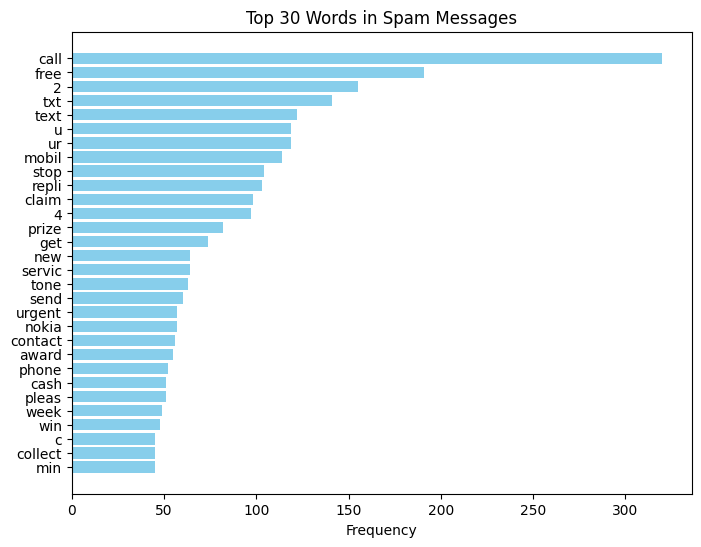

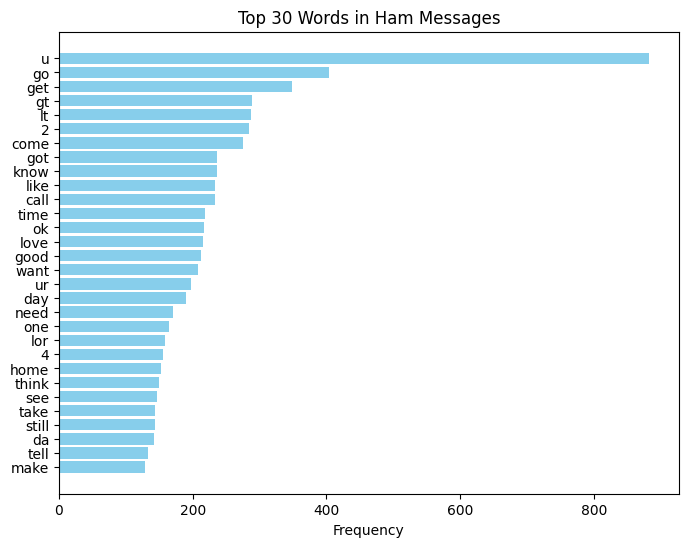

In [44]:
spam_text = data[data['Target'] == 1]['Transformed_Text']
ham_text = data[data['Target'] == 0]['Transformed_Text']

# Plot the most frequent words in spam messages
plot_most_frequent_words(spam_text, 'Top 30 Words in Spam Messages')

# Plot the most frequent words in ham messages
plot_most_frequent_words(ham_text, 'Top 30 Words in Ham Messages')

In [45]:
data.head()

,Target,Text,Text_len,Text_word_len,Text_sentence_len,Transformed_Text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


# Model Building

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, precision_score
import pickle

In [47]:
X_train, X_test, y_train, y_test = train_test_split(data['Transformed_Text'], data['Target'], test_size=0.2, random_state=42)

In [48]:
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [52]:
# Checking various models and picking the best one

models = [
    ('LogisticRegression', LogisticRegression()),
    ('SVC', SVC()),
    ('DecisionTreeClassifier', DecisionTreeClassifier()),
    ('RandomForestClassifier', RandomForestClassifier()),
    ('AdaBoostClassifier', AdaBoostClassifier()),
    ('GradientBoostingClassifier', GradientBoostingClassifier()),
    ('MultinomialNB', MultinomialNB()),
    ('BernoulliNB', BernoulliNB())
]

best_model = None
best_accuracy = 0

# Iterate over the models and evaluate their performance
for name, model in models:
    # Perform cross-validation
    scores = cross_val_score(model, X_train_tfidf, y_train, cv=5)
    
    # Calculate mean accuracy
    mean_accuracy = scores.mean()
    
    # Fit the model on the training data
    model.fit(X_train_tfidf, y_train)
    
    y_pred_train =  model.predict(X_train_tfidf)

    # Calculate precision
    train_precision = precision_score(y_train, y_pred_train)

    # Calculate train accuracy
    train_accuracy = accuracy_score(y_train,y_pred_train)
    
    # Make predictions on the test data
    y_pred_test = model.predict(X_test_tfidf)

    # Calculate precision
    test_precision = precision_score(y_test, y_pred_test)
    
    # Calculate test accuracy
    test_accuracy = accuracy_score(y_test, y_pred_test)
    
    
    # Print the performance metrics
    print("Model:", name)
    print("Cross-validation Accuracy:", mean_accuracy)
    print("Train Precision:", train_precision)
    print("Test Precision:", test_precision)
    print("Train Accuracy:", train_accuracy)
    print("Test Accuracy:", test_accuracy)
    print()
    
    # Check if the current model has the best accuracy
    if test_accuracy > best_accuracy:
        best_accuracy = test_accuracy
        best_model = model

# Save the best model
with open('email_spam_classifier.pkl', 'wb') as f:
    pickle.dump((best_model, vectorizer), f)

print("-----------------------------------------------------------")
print(f"Best model: {best_model.__class__.__name__} with test accuracy score: {best_accuracy}")


Model: LogisticRegression
Cross-validation Accuracy: 0.9429262394195888
Train Precision: 0.9860724233983287
Test Precision: 0.9487179487179487
Train Accuracy: 0.9615477629987909
Test Accuracy: 0.9613152804642167

Model: SVC
Cross-validation Accuracy: 0.9632406287787182
Train Precision: 1.0
Test Precision: 0.9838709677419355
Train Accuracy: 0.9970979443772672
Test Accuracy: 0.9758220502901354

Model: DecisionTreeClassifier
Cross-validation Accuracy: 0.9525997581620315
Train Precision: 1.0
Test Precision: 0.8148148148148148
Train Accuracy: 1.0
Test Accuracy: 0.941972920696325

Model: RandomForestClassifier
Cross-validation Accuracy: 0.9675937122128175
Train Precision: 1.0
Test Precision: 1.0
Train Accuracy: 1.0
Test Accuracy: 0.9690522243713733

Model: AdaBoostClassifier
Cross-validation Accuracy: 0.9603385731559854
Train Precision: 0.9446902654867256
Test Precision: 0.8421052631578947
Train Accuracy: 0.9743651753325272
Test Accuracy: 0.9477756286266924

Model: GradientBoostingClassifier

In [53]:
# load the save model
model = pickle.load(open('email_spam_classifier.pkl', 'rb'))


### Checking the model with some new data to check if the detection is working

In [54]:
with open('email_spam_classifier.pkl', 'rb') as f:
    best_model, vectorizer = pickle.load(f)

def inference(new_data):
    # Transform the new data using the saved vectorizer
    new_data_tfidf = vectorizer.transform(new_data)
    
    # Predict using the loaded model
    pred = best_model.predict(new_data_tfidf)
    
    for message, prediction in zip(new_data, pred):
        label = 'ham' if prediction == 0 else 'spam'
        print(f"Message: {message}\nPrediction: {label}\n")

# Test the inference function
new_data = ["Don't forget about the team lunch tomorrow at 1 PM. See you there!"]
inference(new_data)

new_data = ["Congratulations! You have won 1,000,000. Claim your prize now!"]
inference(new_data)

new_data = ["Please read the documents carefully and get back to me."]
inference(new_data)

Message: Don't forget about the team lunch tomorrow at 1 PM. See you there!
Prediction: ham

Message: Congratulations! You have won 1,000,000. Claim your prize now!
Prediction: spam

Message: Please read the documents carefully and get back to me.
Prediction: ham



## Note :  Model seems to work perfectly